# Group Case Study - Lead Scoring

### The Problem Statement mentioned on upGrad Module
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

## Importing Libraries

In [1]:
# First let's Import the required libraries for upcoming operations on the provided data sets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score

In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [4]:
# Action to filter out the warnings that may pop-up

import warnings
warnings.filterwarnings('ignore')

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## The Dataset

### Lead

We are given Data Set in the form of CSV File called 'Lead'

## Loading the Data

In [5]:
# Here we are reading the csv file named as 'Lead' with 'read_csv' command
df_lead = pd.read_csv(r"D:\PG\Courses\Course - 02 - Machine Learning - 1\Lead Scoring Case Study\Lead Scoring Assignment\Leads.csv")

In [6]:
# Displaying first 5 Rows and all Columns of the 'Lead' csv file
df_lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [7]:
# Displaying Last 5 Rows and all Columns of the 'Lead' csv file
df_lead.tail()

Prospect ID  Lead Number  \
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  ... Get updates on DM Content    Lead Profile  \
9235                  2.67  ...                        No  Potential Lead   
9236                  2.00  ...                        No  Potential Lead   
9237                  2.00  ...                        No  Potential Lead   
9238                  3.00  ...                        No             NaN   
9239                  3.00  ...                        No  Potential Lead   

                    City Asymmetrique Activity Index  \
9235              Mumbai                   02.Medium   
9236              Mumbai                   02.Medium   
9237              Mumbai                   02.Medium   
9238  Other Metro Cities                   02.Medium   
9239        Other Cities                   02.Medium   

     Asymmetrique Profile Index Asymmetrique Activity Score  \
9235                    01.High                        15.0   
9236                    01.High                        14.0   
9237                    01.High                        13.0   
9238                  02.Medium                        15.0   
9239                    01.High                        15.0   

     Asymmetrique Profile Score I agree to pay the amount through cheque  \
9235                       17.0                                       No   
9236                       19.0                                       No   
9237                       20.0                                       No   
9238                       16.0                                       No   
9239                       18.0                                       No   

     A free copy of Mastering The Interview Last Notable Activity  
9235                                     No     Email Marked Spam  
9236                                    Yes              SMS Sent  
9237                                    Yes              SMS Sent  
9238                                     No              SMS Sent  
9239                                    Yes              Modified  

[5 rows x 37 columns]

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Understanding the Data

Now, performing our basic Metadata check.

### Quality Check of Data

In [8]:
# First checking the number of Rows and Columns of Lead Dataframe

df_lead.shape

(9240, 37)

In [9]:
# Here we are checking the information of Columns of Lead Dataframe

df_lead.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
# Here we are checking the description of Lead Dataframe

df_lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

Now, we can clearly see the mathematical values of Dataframe like: count, mean, std, min, max, etc.

In [11]:
# Here we are checking number of NaN Values in each column of the Lead Dataframe

df_lead.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
# Here we are checking the total number of NaN Values in the entire Lead Dataframe

df_lead.isna().sum().sum()

41039

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Data Cleaning

Now, we will start our operations on Dataframe and we will start it by cleaning the data provided in csv file of Lead Data.

In [13]:
# Here we are converting all the values to 'lower case'

df_lead = df_lead.applymap(lambda s:s.lower() if type(s) == str else s)

Since, 'Select' means no option is selected. Therefore, we will replace it with NaN.

In [14]:
# Here we are replacing 'Select' with NaN
df_lead = df_lead.replace('select',np.nan)

Now, let's check Columns with one Unique Value. They will not affect our upcoming analysis.

In [15]:
# Here we are checking if there are columns with one unique value

df_lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [16]:
# Here we are dropping Unique Valued Columns

df_lead_01= df_lead.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

Now, let's heck the percentage of Missing Values in our given Lead Dataframe

In [17]:
# Here we are checking the percentage of missing values

round(100*(df_lead_01.isnull().sum()/len(df_lead_01.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

Now, let's drop all those Columns which are not required for our further analysis and which are having Null Values or NaN greater than or equal to 35%.

In [18]:
# Here we are removing all the Columns that are no required and have >= 35% NaN Values

df_lead_02 = df_lead_01.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df_lead_02.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      api   
1  2a272436-5132-4136-86fa-dcc88c88f482                      api   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  landing page submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  landing page submission   
4  3256f628-e534-4826-9d63-4a8b88782852  landing page submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      olark chat           no          no          0          0.0   
1  organic search           no          no          0          5.0   
2  direct traffic           no          no          1          2.0   
3  direct traffic           no          no          0          1.0   
4          google           no          no          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  page visited on website   
1                          674                   2.5             email opened   
2                         1532                   2.0             email opened   
3                          305                   1.0              unreachable   
4                         1428                   1.0        converted to lead   

   ... What is your current occupation  \
0  ...                      unemployed   
1  ...                      unemployed   
2  ...                         student   
3  ...                      unemployed   
4  ...                      unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       better career prospects     no                no   
1                       better career prospects     no                no   
2                       better career prospects     no                no   
3                       better career prospects     no                no   
4                       better career prospects     no                no   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 no        no                    no                      no   
1                 no        no                    no                      no   
2                 no        no                    no                      no   
3                 no        no                    no                      no   
4                 no        no                    no                      no   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     no              modified  
1                                     no          email opened  
2                                    yes          email opened  
3                                     no              modified  
4                                     no              modified  

[5 rows x 22 columns]

Now, let's again check the percentage of Missing Values.

In [19]:
# Here we are again checking the percentage of missing values

round(100*(df_lead_02.isnull().sum()/len(df_lead_02.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

**Our Inference** -

1. We can observe that there is a huge value of Null Variables in Columns of 'Country', 'Specialization', 'What is your current occupation' and 'What matters most to you in choosing a course' as seen above.
2. But, removing the rows with the Null Value will cost us a lot of data because they are important Columns. 
3. Hence, instead we are going to replace the NaN values with 'not provided'.
4. In this way, we can have all the data and almost no Null Values. 
5. Also, if in any case, they come up in the model, it will be of no use and we can drop them off then.

In [20]:
# Here we are replacing the NaN values with 'not provided'

df_lead_02['Specialization'] = df_lead_02['Specialization'].fillna('not provided') 
df_lead_02['What matters most to you in choosing a course'] = df_lead_02['What matters most to you in choosing a course'].fillna('not provided')
df_lead_02['Country'] = df_lead_02['Country'].fillna('not provided')
df_lead_02['What is your current occupation'] = df_lead_02['What is your current occupation'].fillna('not provided')
df_lead_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

Let's again recheck the percentage of Missing Values.

In [21]:
# Here we are rechecking the percentage of missing values

round(100*(df_lead_02.isnull().sum()/len(df_lead_02.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [22]:
# Here we are displaying all the Values in the Column Country

df_lead_02["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

Now, let's properly categories all the Values of Column Country as 'india', 'outside india' and 'not provided'.

In [23]:
# Here we are categorising the Values of Column Country

def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df_lead_02['Country'] = df_lead_02.apply(lambda x:slots(x['Country']), axis = 1)
df_lead_02['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [24]:
# Here we are again checking the percentage of missing values

round(100*(df_lead_02.isnull().sum()/len(df_lead_02.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

Now, let's see some the outcomes after dropping couple of Rows and replacing NaN Values.

In [25]:
# Here we are checking the percentage of loss of given Data if the null values are removed

round(100*(sum(df_lead_02.isnull().sum(axis=1) > 1)/df_lead_02.shape[0]),2)

1.48

In [26]:
df_lead_03 = df_lead_02[df_lead_02.isnull().sum(axis=1) <1]

In [27]:
# Here we are checking number of rows left in percentage

round(100*(df_lead_03.shape[0])/(df_lead.shape[0]),2)

98.2

In [28]:
# Here we are again rechecking the percentage of missing values

round(100*(df_lead_03.isnull().sum()/len(df_lead_03.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

Let's see all the Categorical Values present in the given Dataframe.

In [29]:
# Here we are analysing all the categorical values

for column in df_lead_03:
    print(df_lead_03[column].astype('category').value_counts())
    print('*******************************************************************************************')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9074, dtype: int64
*******************************************************************************************
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
*******************************************************************************************
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website  

As we know that the ID is unique for everyone. Hence, we will drop it from our Dataframe.

In [30]:
# Here we are removing Id values
df_final = df_lead_03.drop('Prospect ID',1)


Now, let's finally check the Number of Rows and Columns left after our recent operations on given Lead Dataframe.

In [31]:
# Here we are checking the number of rows and columns

df_final.shape

(9074, 21)

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## EDA

Now, let's start with our next step of visualizing the data on different parameters.

### Univariate Analysis

Now, we are going to start with Univariate Analysis on the Columns of Lead Dataframe.

#### Categorical Variables

Let's kickstart it with Categorical Variables.

In [32]:
# Here we are checking all the Columns info of our latest instnce of Lead Dataframe

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

Now, let's move ahead and plot the Countplot of all the Categorical Variables with Object datatype.

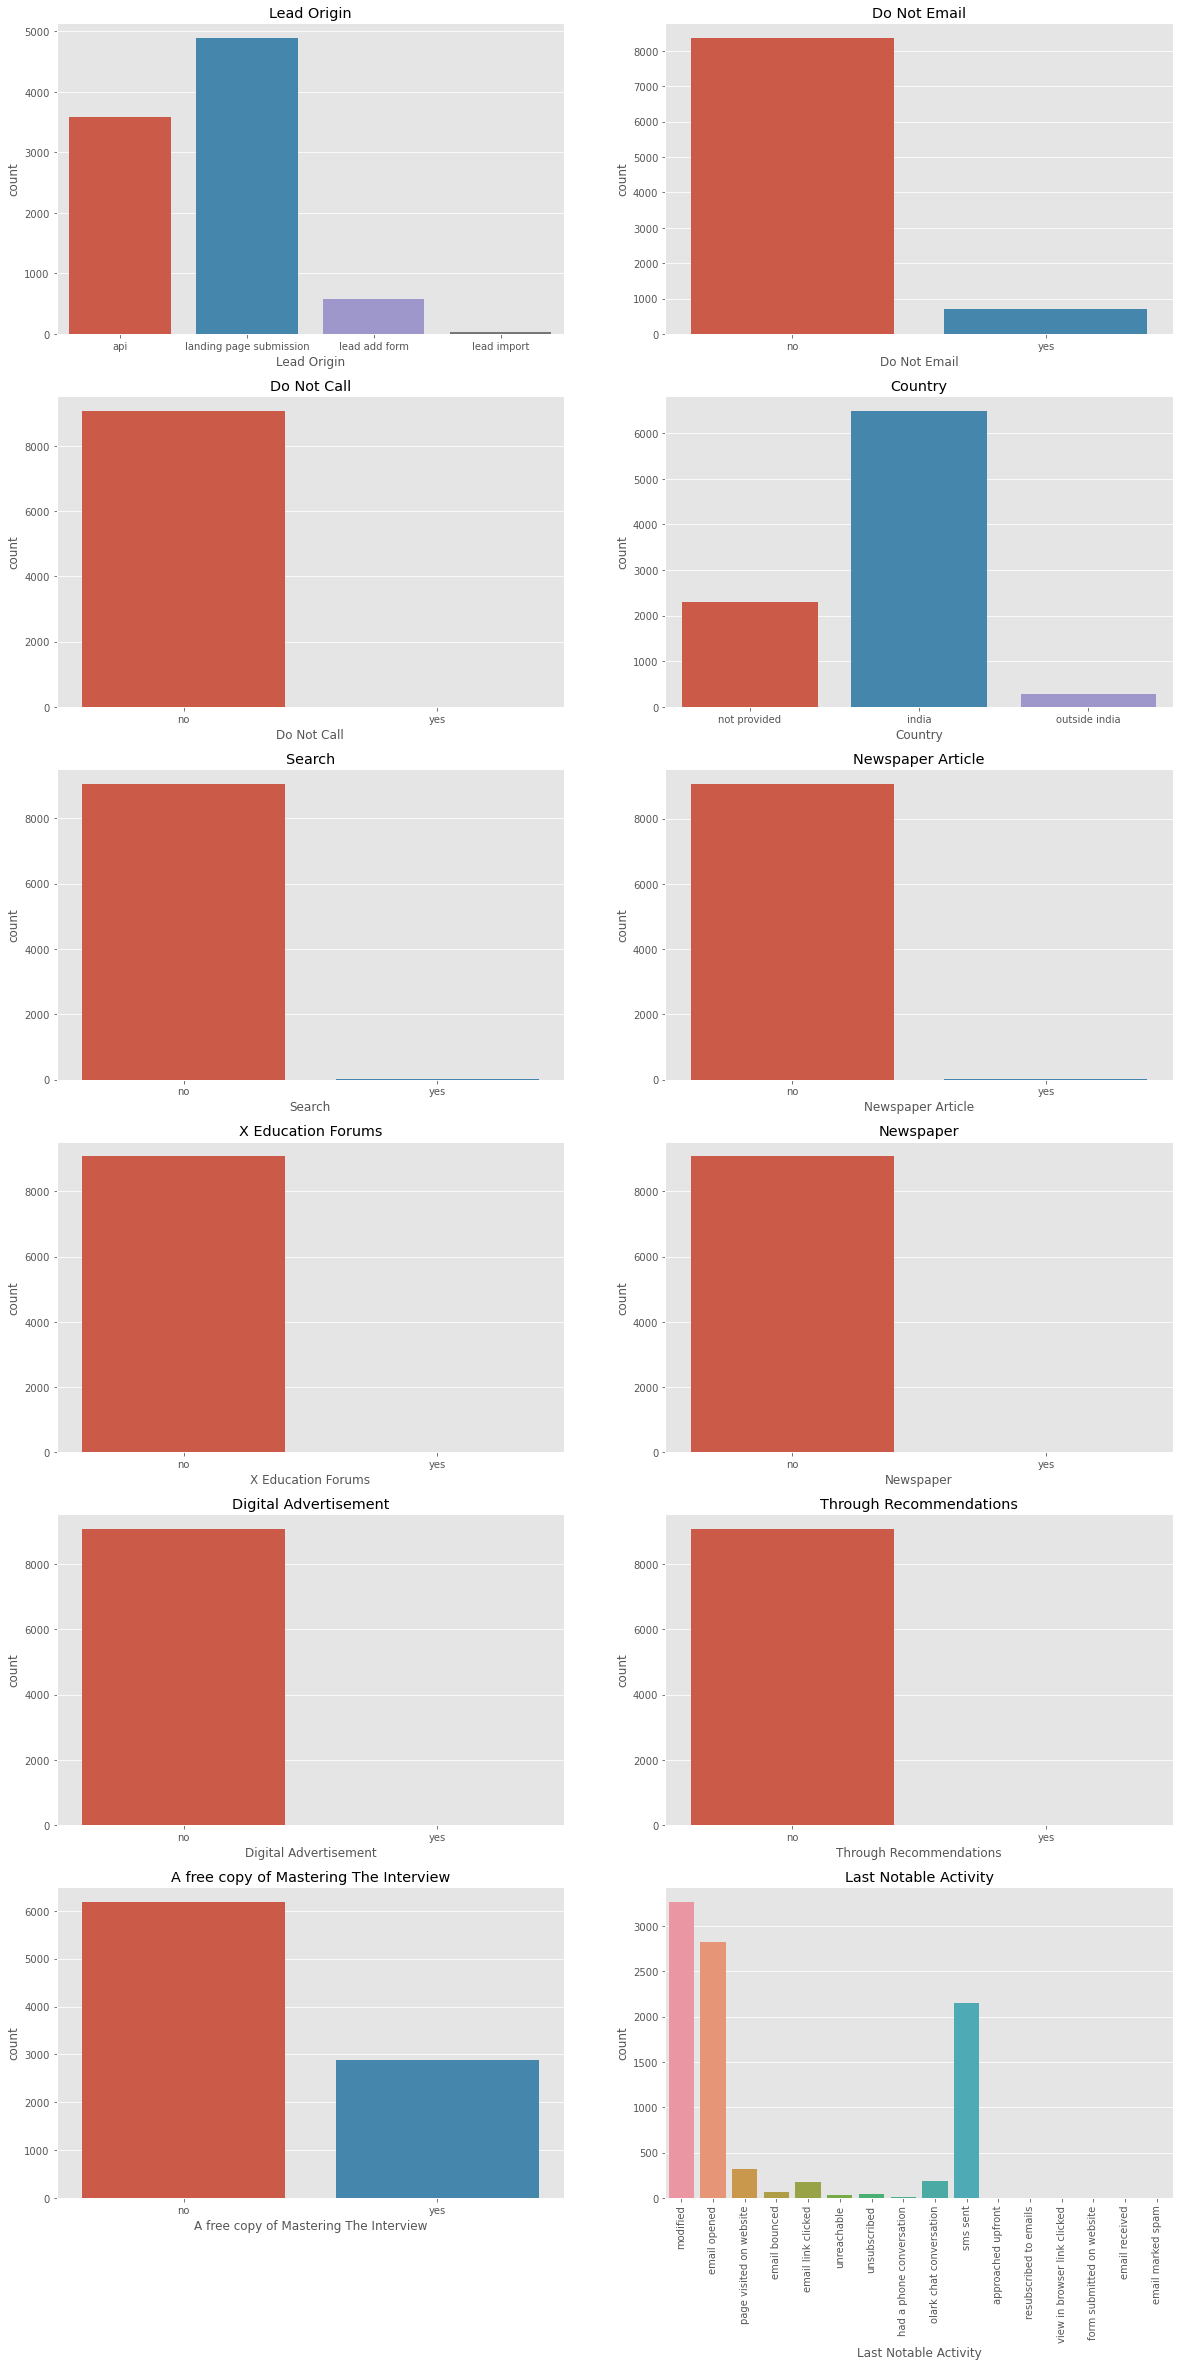

In [33]:
# Here we are plotting countplot for categorical variables

plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df_final['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df_final['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

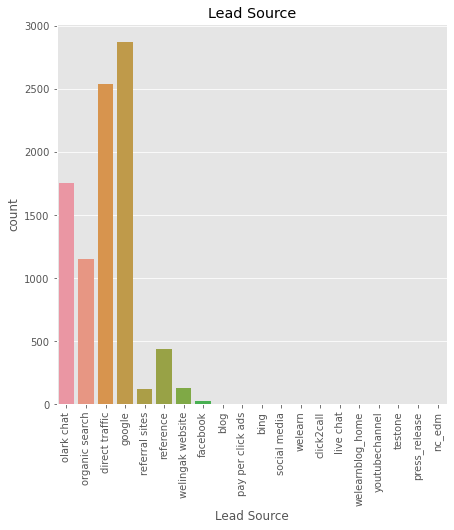

In [34]:
# Here we are plotting a countplot for column Lead Source

plt.figure(figsize=(7,7))
sns.countplot(df_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

Let's plot the Countplots for Columns of 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course' and 'Last Activity'.

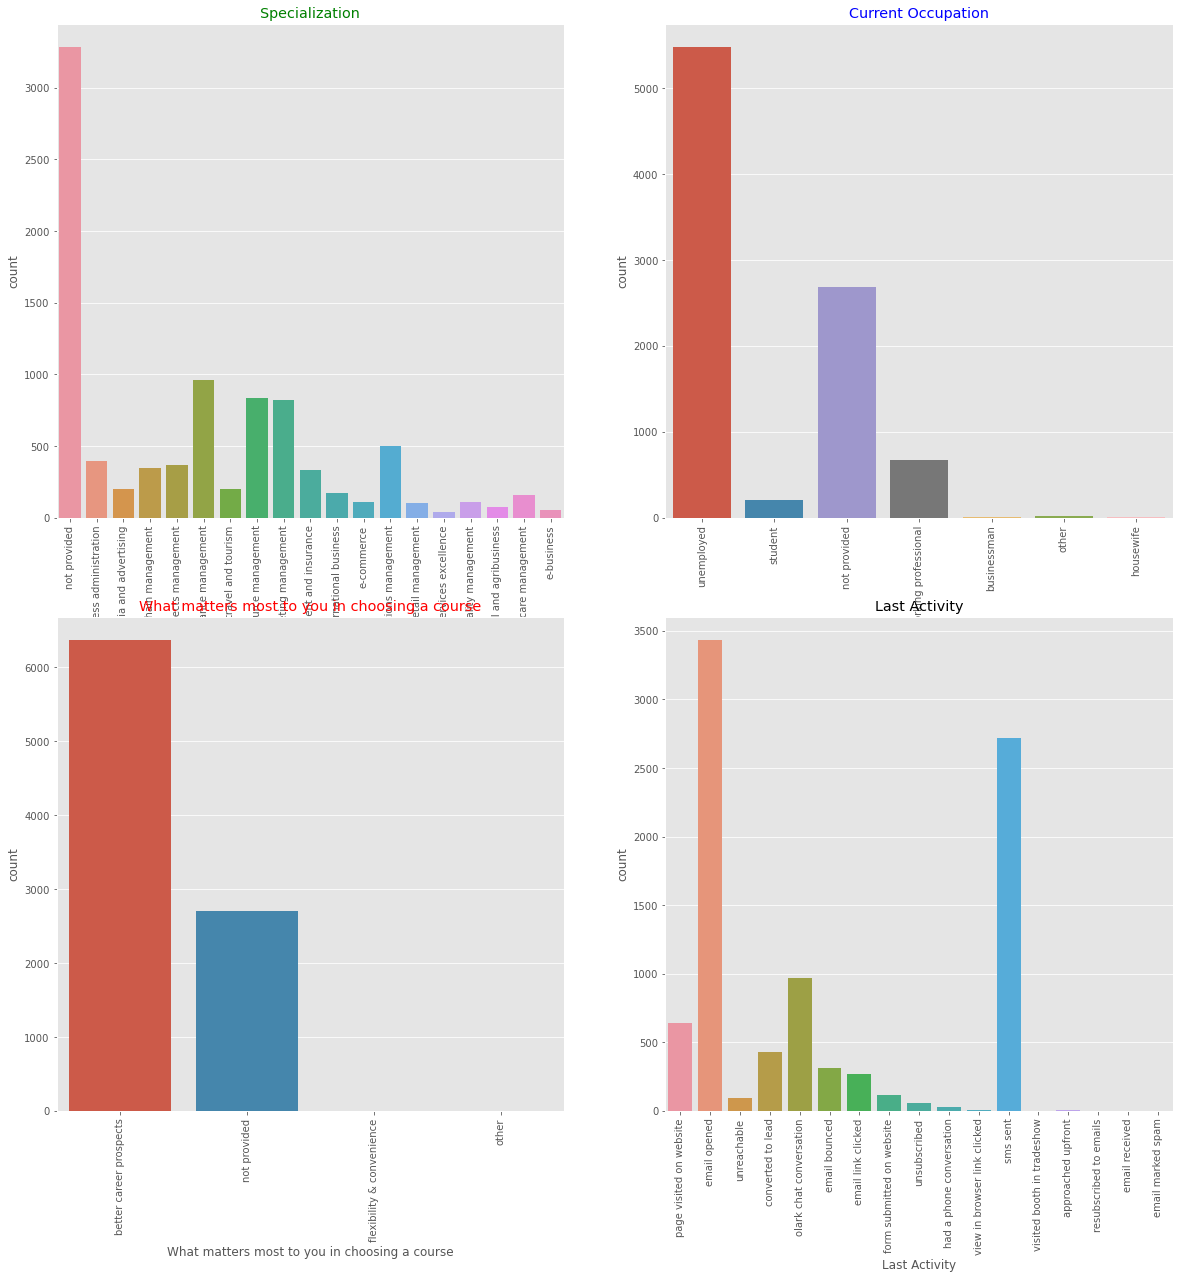

In [35]:
# Here we are plotting countplots

plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
sns.countplot(df_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization', color = 'Green')
plt.subplot(2,2,2)
sns.countplot(df_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation', color = 'Blue')
plt.subplot(2,2,3)
sns.countplot(df_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course', color = 'Red')
plt.subplot(2,2,4)
sns.countplot(df_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity', color = 'Black')
plt.show()

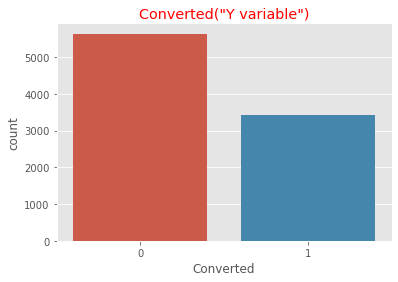

In [36]:
# Here we are plotting a countplot for Column Converted

sns.countplot(df_final['Converted'])
plt.title('Converted("Y variable")', color = 'Red')
plt.show()

#### Numerical Variables

Now, let's do it for Numerical Variables.

In [37]:
# Here we are checking all the Columns info of our latest instnce of Lead Dataframe

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

Let's plot Histograms for the Columns of 'TotalVisits', 'Total Time Spent on Website' and 'Page Views Per Visit'.

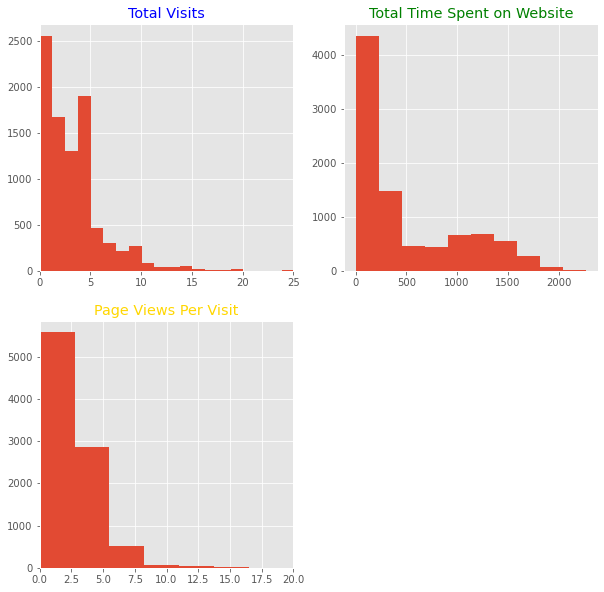

In [38]:
# Here we are plotting Histograms

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_final['TotalVisits'], bins = 200)
plt.title('Total Visits', color = 'Blue')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website', color = 'Green')

plt.subplot(223)
plt.hist(df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit', color = 'Gold')
plt.xlim(0,20)
plt.show()

### Relating all the Categorical Variables to Converted

Now, let's relate all the Converted results to Categorial Variables.

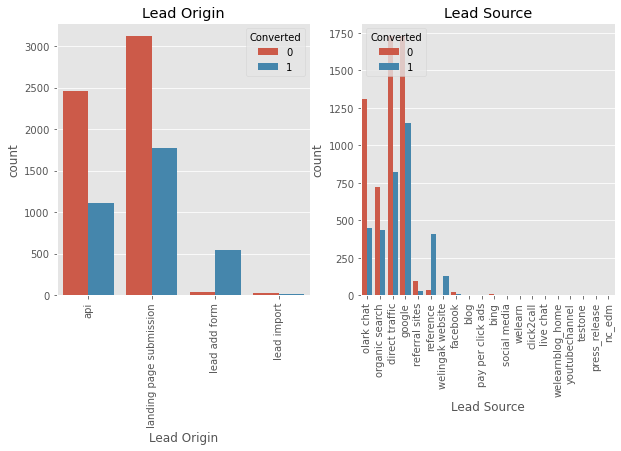

In [39]:
# Here we are plotting Countplot for the Columns of 'Lead Origin' and 'Lead Source' with respected to Converted

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_final, ).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

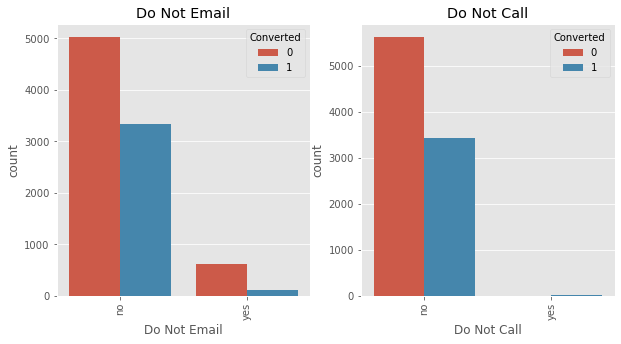

In [40]:
# Here we are plotting Countplot for the Columns of 'Do Not Email' and 'Do Not Call' with respected to Converted

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

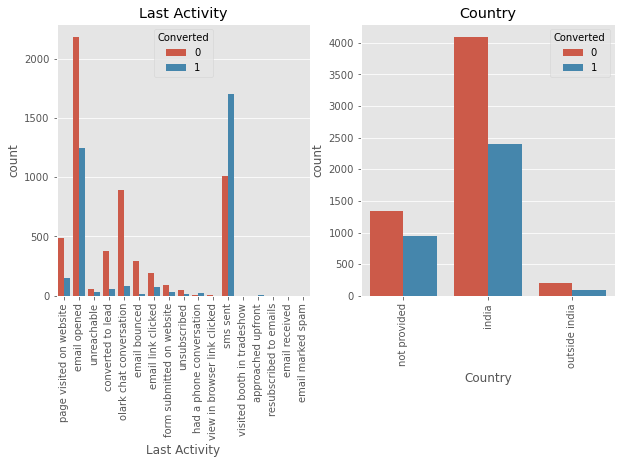

In [41]:
# Here we are plotting Countplot for the Columns of 'Last Activity' and 'Country' with respected to Converted

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

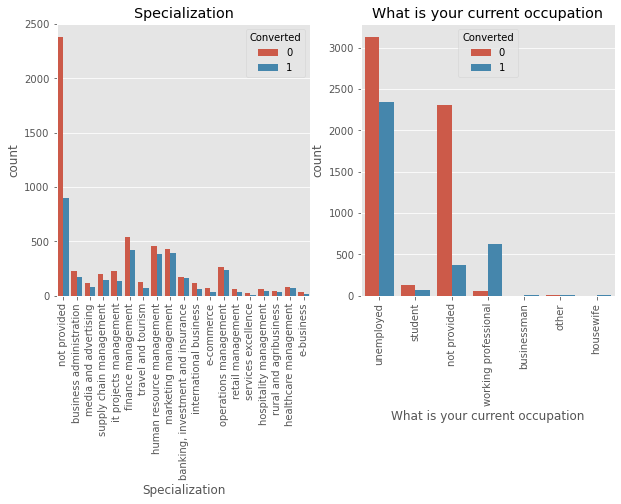

In [42]:
# Here we are plotting Countplot for the Columns of 'Specialization' and 'What is your current occupation' with respected to Converted

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

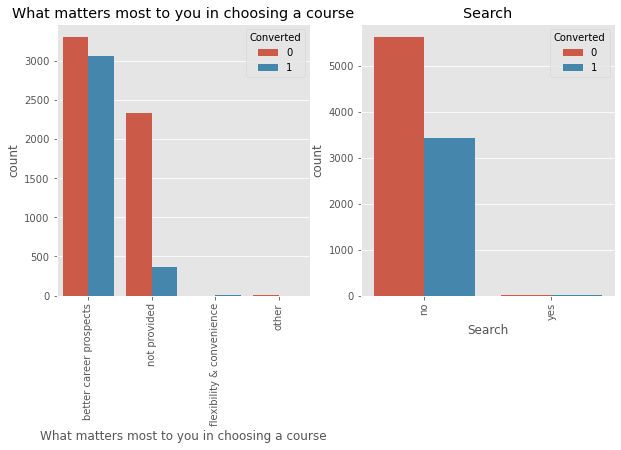

In [43]:
# Here we are plotting Countplot for the Columns of 'What matters most to you in choosing a course' and 'Search' with respected to Converted


plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

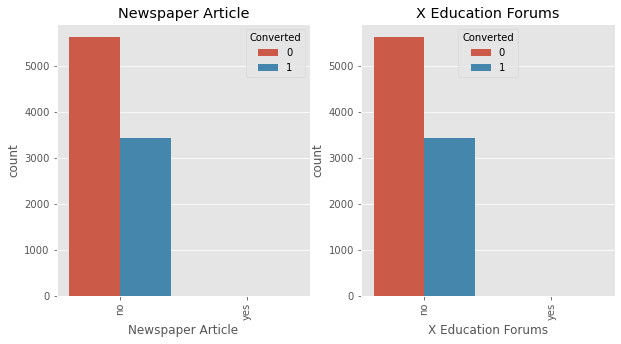

In [44]:
# Here we are plotting Countplot for the Columns of 'Newspaper Article' and 'X Education Forums' with respected to Converted

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

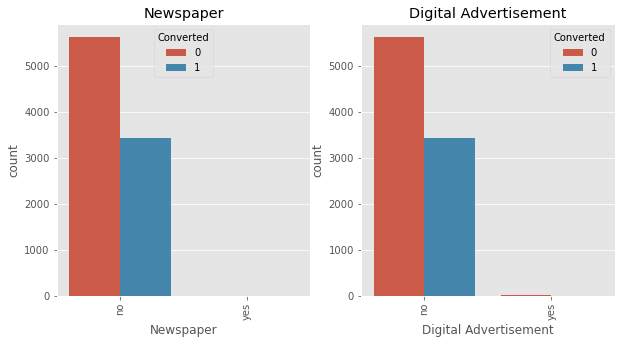

In [45]:
# Here we are plotting Countplot for the Columns of 'Newspaper' and 'Digital Advertisement' with respected to Converted

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

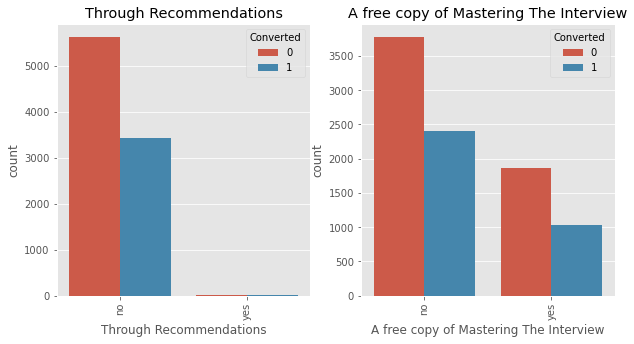

In [46]:
# Here we are plotting Countplot for the Columns of 'Through Recommendations' and 'A free copy of Mastering The Interview' with respected to Converted

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

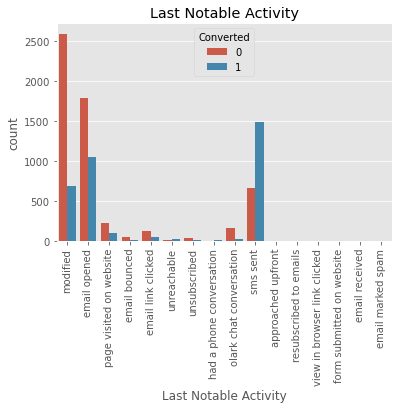

In [47]:
# Here we are plotting a countplot for Column 'Last Notable Activity' with respect to Converted

sns.countplot(x='Last Notable Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

Now, let's plot a Heatmap to check correlation between the Variables.

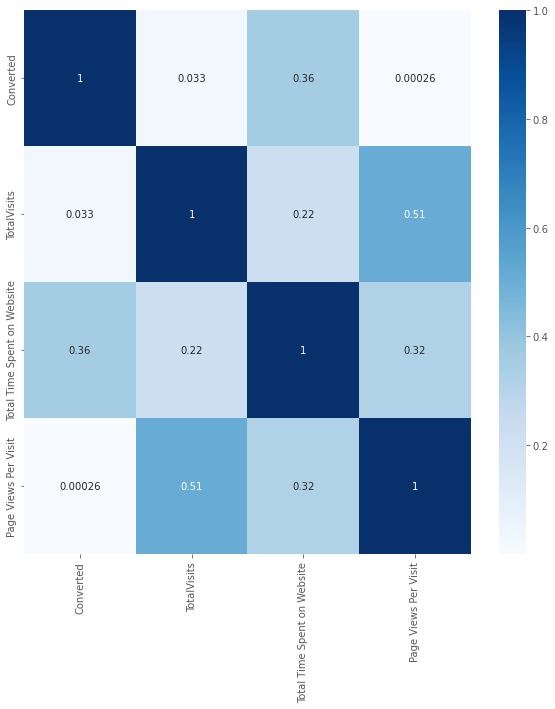

In [48]:
# Here we are checking the correlation among varibles

plt.figure(figsize=(10,10))
sns.heatmap(df_final.corr(), annot = True, cmap = "Blues")
plt.show()

**Our Inference** -

1. We observed from the above analysis that there many Columns which are having quite less data.
2. These Columns will be of less applicability for our further analysis.

Let's describe the Columns of 'TotalVisits', 'Total Time Spent on Website' and 'Page Views Per Visit' in the terms of mean, std, min, max, etc.

In [49]:
# Here we are describing the Columns

numeric = df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.456028                   482.887481              2.370151
std       4.858802                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   922.750000              3.200000
90%       7.000000                  1373.000000              5.000000
99%      17.000000                  1839.000000              9.000000
max     251.000000                  2272.000000             55.000000

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Data Preparation

Now, we have our data, let's prepare it for upcoming major operations of Modelling. For that, we will now create indicator variables, test and train sets, etc.

### Dummy Variables or Indicator Variables

Now, let's move ahead and do the Dummy Encoding for the Categorical Variables.

In [50]:
# Here we are checking all the Columns info of our latest instnce of Lead Dataframe

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

Now, let's collect all the Object type variables in a single Dataframe.

In [51]:
# Here we are putting all the Categorical Variables in single dataframe

df_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Now, let's finally create the Dummy Variables.

In [52]:
# Here we are creating dummy variables

dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         api      olark chat           no          no   
1                         api  organic search           no          no   
2     landing page submission  direct traffic           no          no   
3     landing page submission  direct traffic           no          no   
4     landing page submission          google           no          no   
...                       ...             ...          ...         ...   
9235  landing page submission  direct traffic          yes          no   
9236  landing page submission  direct traffic           no          no   
9237  landing page submission  direct traffic          yes          no   
9238  landing page submission          google           no          no   
9239  landing page submission  direct traffic           no          no   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity        Country  ...  \
0                     0.00  page visited on website   not provided  ...   
1                     2.50             email opened          india  ...   
2                     2.00             email opened          india  ...   
3                     1.00              unreachable          india  ...   
4                     1.00        converted to lead          india  ...   
...                    ...                      ...            ...  ...   
9235                  2.67        email marked spam  outside india  ...   
9236                  2.00                 sms sent          india  ...   
9237                  2.00                 sms sent          india  ...   
9238                  3.00                 sms sent          india  ...   
9239                  3.00                 sms sent  outside india  ...   

     Last Notable Activity_form submitted on website  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
9235                                               0   
9236                                               0   
9237                                               0   
9238                                               0   
9239                                               0   

     Last Notable Activity_had a phone conversation  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
9235                                              0   
9236                                              0   
9237                                              0   
9238                                              0   
9239                                              0   

     Last Notable Activity_modified  \
0                                 1   
1                                 0   
2                                 0   
3    

In [53]:
df_final_dum.shape

(9074, 100)

Now, as we just created the Indicator Variables. So, let's drop the actual columns and replace them with these newly created Indicator Variables in the Dataframe.

In [54]:
# Here we are dropping the actual columns and adding indicator variable columns to the Dataframe

df_final_dum = df_final_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_final_dum

Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  Lead Origin_landing page submission  \
0                     0.00                                    0   
1                     2.50                                    0   
2                     2.00                                    1   
3                     1.00                                    1   
4                     1.00                                    1   
...                    ...                                  ...   
9235                  2.67                                    1   
9236                  2.00                                    1   
9237                  2.00                                    1   
9238                  3.00                                    1   
9239                  3.00                                    1   

      Lead Origin_lead add form  Lead Origin_lead import  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
9235                          0                        0   
9236                          0                        0   
9237                          0                        0   
9238                          0                        0   
9239                          0                        0   

      Specialization_business administration  Specialization_e-business  \
0                                          0                          0   
1                                          0                          0   
2                                          1                          0   
3                                          0                          0   
4                                          0                          0   
...                                      ...                        ...   
9235                                       0                          0   
9236                                       0                          0   
9237                                       1                          0   
9238                                       0                          0   
9239                                       0                          0   

      Specialization_e-commerce  ...  \
0                             0  ...   
1                             0  ...   
2                             0  ...   
3                             0  ...   
4                             0  ...   
...                         ...  ...   
9235                          0  ...   
9236                          0  ...   
9237                          0  ...   
9238                          0  ...   
9239                          0  ...   

      Last Notable Activity_form submitted on website  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                    

In [55]:
# Displaying first 5 Rows and all Columns of the Dataset after creating the Dummy Variables

df_final_dum.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_lead import  Specialization_business administration  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Specialization_e-business  Specialization_e-commerce  ...  \
0                          0                          0  ...   
1                          0                          0  ...   
2                          0                          0  ...   
3                          0                          0  ...   
4                          0                          0  ...   

   Last Notable Activity_form submitted on website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_had a phone conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_olark chat conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_page visited on website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_sms sent  Last Notable Activity_unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_unsubscribed  \
0                          

In [56]:
# Here we are checking the number of Rows and Columns in Dataset after creating the Dummy Variables

df_final_dum.shape

(9074, 81)

In [57]:
# Here we are checking the Columns present in Dataset after creating the Dummy Variables

df_final_dum.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 81 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9074 non-null   int64  
 1   TotalVisits                                           9074 non-null   float64
 2   Total Time Spent on Website                           9074 non-null   int64  
 3   Page Views Per Visit                                  9074 non-null   float64
 4   Lead Origin_landing page submission                   9074 non-null   uint8  
 5   Lead Origin_lead add form                             9074 non-null   uint8  
 6   Lead Origin_lead import                               9074 non-null   uint8  
 7   Specialization_business administration                9074 non-null   uint8  
 8   Specialization_e-business                             9074

In [58]:
# Here we are checking the latest instance of the Columns of our Dataframe

df_final_dum.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_landing page submission',
       'Lead Origin_lead add form', 'Lead Origin_lead import',
       'Specialization_business administration', 'Specialization_e-business',
       'Specialization_e-commerce', 'Specialization_finance management',
       'Specialization_healthcare management',
       'Specialization_hospitality management',
       'Specialization_human resource management',
       'Specialization_international business',
       'Specialization_it projects management',
       'Specialization_marketing management',
       'Specialization_media and advertising',
       'Specialization_operations management',
       'Specialization_retail management',
       'Specialization_rural and agribusiness',
       'Specialization_services excellence',
       'Specialization_supply chain management',
       'Specialization_travel and tourism', 'Lead Source_blog',
       'Lead Source

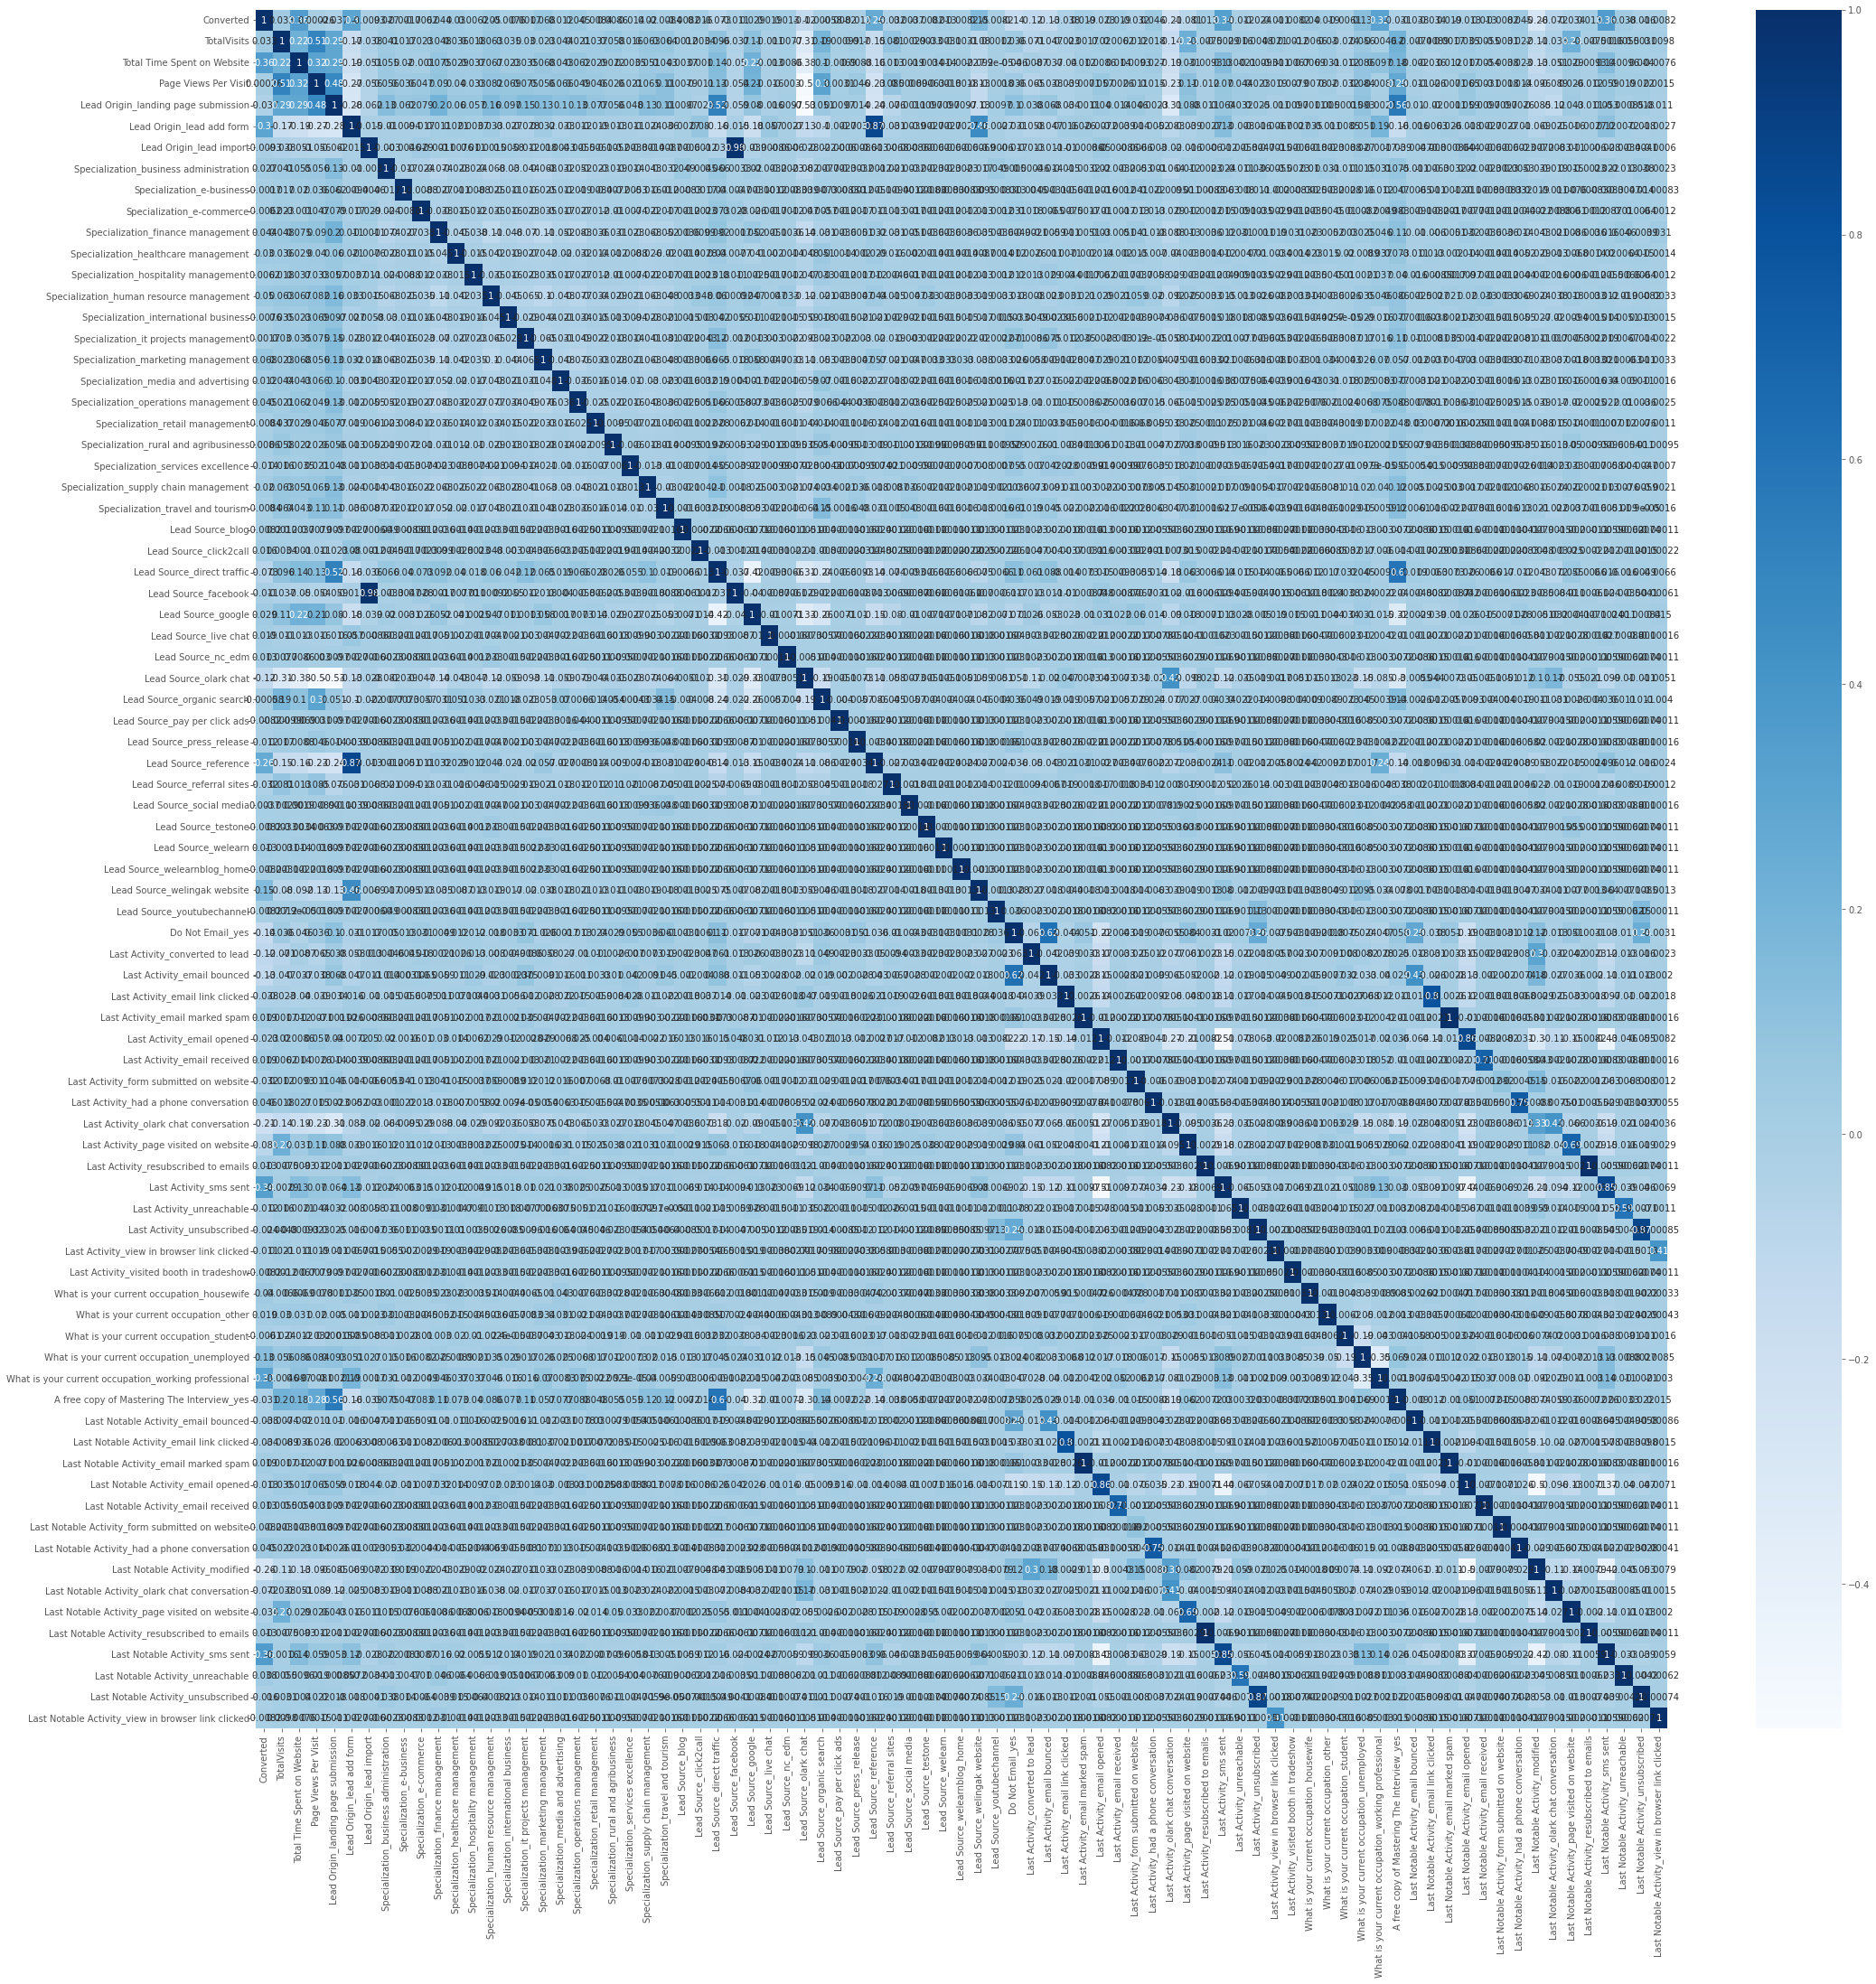

In [59]:
# Here we are making a heatmap of Dataset after creating the Dummy Variables

plt.figure(figsize = (35,35))
sns.heatmap(df_final_dum.corr(),annot = True, cmap = "Blues")
plt.show()

###  Splitting Data Set - Test Subset & Train Subsett

Now, our first major operation that we are going to do is that splitting the Dataframe into Test and Train Subsets for to start the modelling operations just after this.

Now, let's create the variable X and drop the Column Converted.

In [60]:
# Here we creating variable X

X = df_final_dum.drop(['Converted'], 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_lead import  Specialization_business administration  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Specialization_e-business  Specialization_e-commerce  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Specialization_finance management  ...  \
0                                  0  ...   
1                                  0  ...   
2                                  0  ...   
3                                  0  ...   
4                                  0  ...   

   Last Notable Activity_form submitted on website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_had a phone conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_olark chat conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_page visited on website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_sms sent  Last Notable Activity_unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0     

Now, let's put the Target Variable i.e. Converted into y.

In [61]:
# Here we are putting the target variable in y

y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

Now, let's split our data set into 70% Train Set and 30% Test Set.

#### X_train, Y_train, X_test, Y_test

In [62]:
# Here we are spliting the dataset into train and test respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

### Scaling Numericals Features

As we have Continuous Variables, let's normalize for the better working of our upcoming models.

In [63]:
# Here we are scaling the three numeric features

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [64]:
# Displaying first 5 Rows and all Columns of the X_train Dataset

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1289     0.014184                     0.612676              0.083333   
3604     0.000000                     0.000000              0.000000   
5584     0.042553                     0.751761              0.250000   
7679     0.000000                     0.000000              0.000000   
7563     0.014184                     0.787852              0.083333   

      Lead Origin_landing page submission  Lead Origin_lead add form  \
1289                                    1                          0   
3604                                    0                          0   
5584                                    1                          0   
7679                                    0                          0   
7563                                    1                          0   

      Lead Origin_lead import  Specialization_business administration  \
1289                        0                                       0   
3604                        0                                       0   
5584                        0                                       0   
7679                        0                                       0   
7563                        0                                       0   

      Specialization_e-business  Specialization_e-commerce  \
1289                          0                          0   
3604                          0                          0   
5584                          0                          0   
7679                          0                          0   
7563                          0                          0   

      Specialization_finance management  ...  \
1289                                  1  ...   
3604                                  0  ...   
5584                                  0  ...   
7679                                  0  ...   
7563                                  0  ...   

      Last Notable Activity_form submitted on website  \
1289                                                0   
3604                                                0   
5584                                                0   
7679                                                0   
7563                                                0   

      Last Notable Activity_had a phone conversation  \
1289                                               0   
3604                                               0   
5584                                               0   
7679                                               0   
7563                                               0   

      Last Notable Activity_modified  \
1289                               0   
3604                               0   
5584                               0   
7679                               0   
7563                               1   

      Last Notable Activity_olark chat conversation  \
1289                                              0   
3604                                              0   
5584                                              0   
7679                                              0   
7563                                              0   

      Last Notable Activity_page visited on website  \
1289                                              0   
3604                                              1   
5584                                              0   
7679                                              0   
7563                                              0   

      Last Notable Activity_resubscribed to emails  \
1289                                             0   
3604                                             0   
5584                                             0   
7679                                             0   
7563                                             0   

      Last Notable Activity_sms sent  Last Notable Activity_unreachable  \
1289                               0                    

In [65]:
# Here we are checking the number of Rows and Columns of X_train Dataframe

X_train.shape

(6351, 80)

In [66]:
# Here we are checking the Columns present in our newly created x_train dataset

X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Origin_lead import', 'Specialization_business administration',
       'Specialization_e-business', 'Specialization_e-commerce',
       'Specialization_finance management',
       'Specialization_healthcare management',
       'Specialization_hospitality management',
       'Specialization_human resource management',
       'Specialization_international business',
       'Specialization_it projects management',
       'Specialization_marketing management',
       'Specialization_media and advertising',
       'Specialization_operations management',
       'Specialization_retail management',
       'Specialization_rural and agribusiness',
       'Specialization_services excellence',
       'Specialization_supply chain management',
       'Specialization_travel and tourism', 'Lead Source_blog',
       'Lead Source_click2call',

In [67]:
y_train.head()

1289    1
3604    0
5584    0
7679    0
7563    0
Name: Converted, dtype: int64

Let's plot a Heatmap to check the correlation between our X_train datasets.

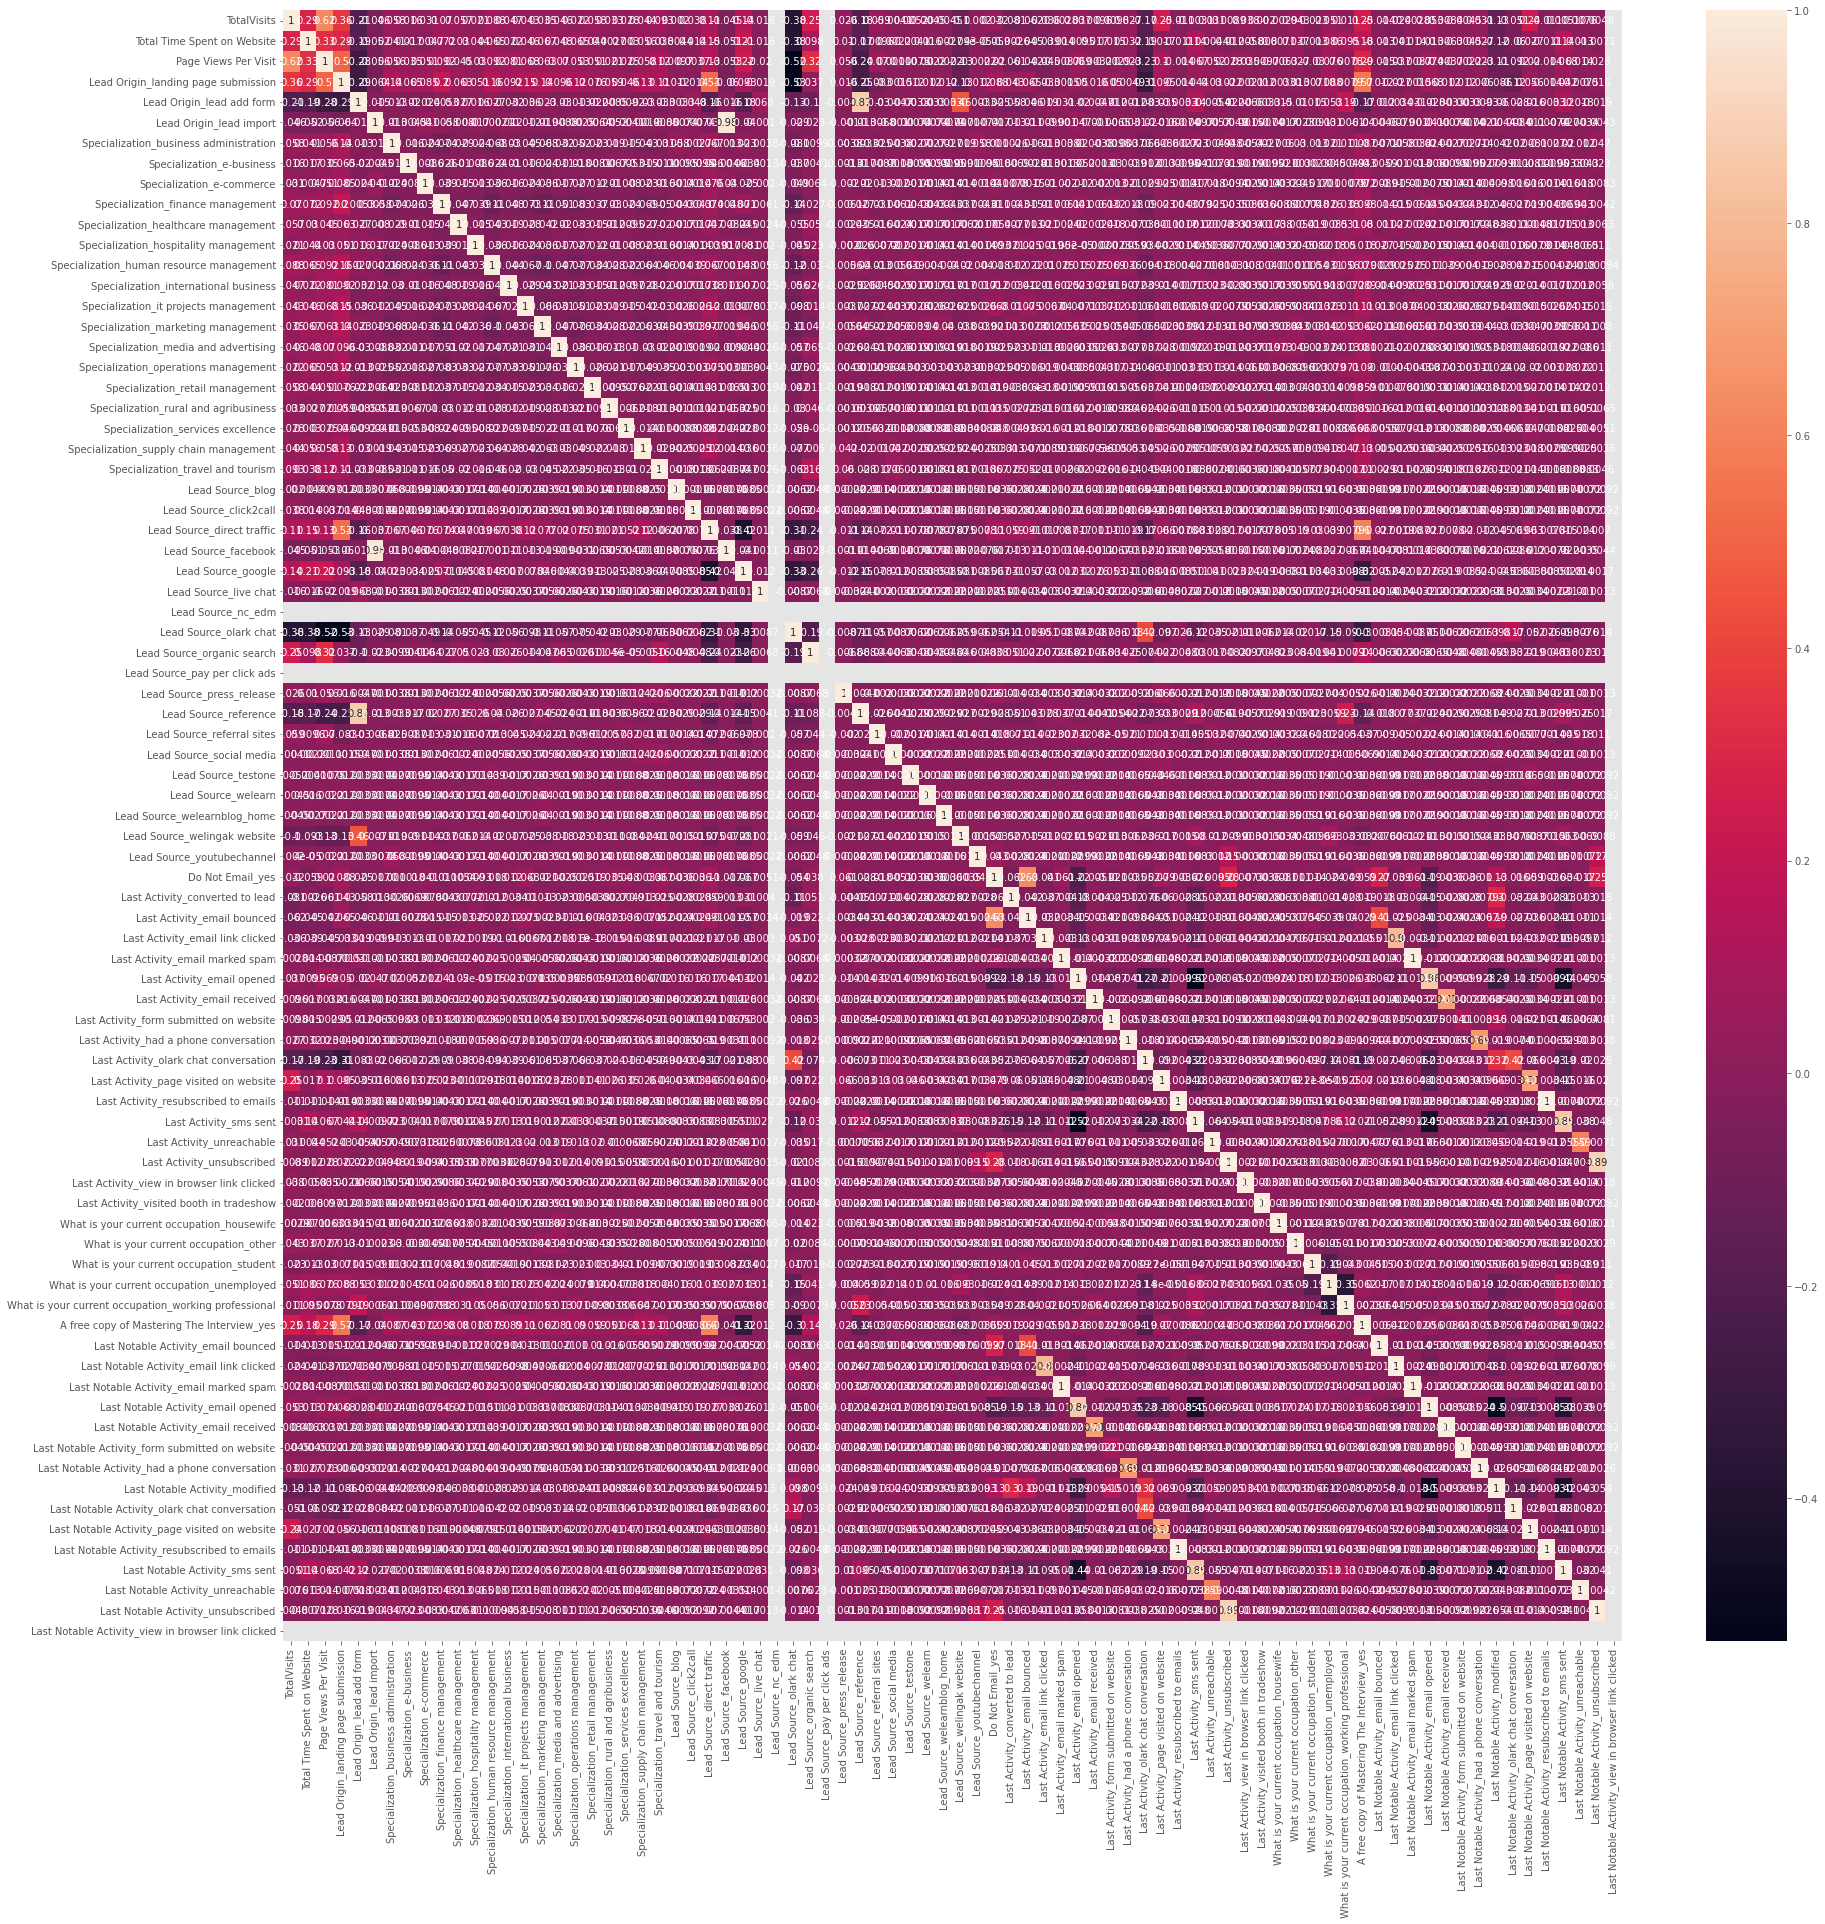

In [68]:
# To check the correlation among varibles of X_train dataset
plt.figure(figsize=(30,30))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

**Our Inference** -

1. We see a lot of correlations between variables which is highly strong.
2. We will drop these variables in our further operations of RFE.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Model Building 

Now, let's begin with the main operation of Modelling. Here we will follow an approach where from Recursive Feature Elimination(RFE) we will filter 15 meaningful columns. After this, we will follow p-value method and VIF for further Elimination Operations.

### Recursive Feature Elimination (RFE)

Let's first do RFE to select 15 Features for the further operations of model building.

In [69]:
# Here we are selecting 15 Features from Recursive Feature Elimination(RFE)

logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [70]:
# Here we are displaying Features that have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', False, 26),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 40),
 ('Specialization_business administration', False, 33),
 ('Specialization_e-business', False, 32),
 ('Specialization_e-commerce', False, 23),
 ('Specialization_finance management', False, 30),
 ('Specialization_healthcare management', False, 25),
 ('Specialization_hospitality management', False, 45),
 ('Specialization_human resource management', False, 31),
 ('Specialization_international business', False, 37),
 ('Specialization_it projects management', False, 28),
 ('Specialization_marketing management', False, 22),
 ('Specialization_media and advertising', False, 42),
 ('Specialization_operations management', False, 27),
 ('Specialization_retail management', False, 63),
 ('Specialization_rural and agribusiness', False, 24),
 ('Specialization_serv

In [71]:
# Here we are doing the the RFE Feature Ranking

rfe_ranking = pd.DataFrame({'rank' : rfe.ranking_, 'support': rfe.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

rank  support                                           features
0      1     True                                        TotalVisits
61     1     True            What is your current occupation_student
62     1     True         What is your current occupation_unemployed
54     1     True                             Last Activity_sms sent
51     1     True              Last Activity_olark chat conversation
..   ...      ...                                                ...
24    62    False                             Lead Source_click2call
18    63    False                   Specialization_retail management
29    64    False                                 Lead Source_nc_edm
32    65    False                      Lead Source_pay per click ads
79    66    False  Last Notable Activity_view in browser link cli...

[80 rows x 3 columns]

In [72]:
# Here we are puting all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [73]:
# Here we are selecting columns finalized by RFE

X_train = X_train[col]

### Variance Inflation Factor (VIF)

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

**VIFi = 1/(1−Ri^2)**

Let's now verify multicollinearity by finding the VIF of our latest set of features.

In [74]:
# Here we are finding the VIF for the features selected

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11         What is your current occupation_unemployed  2.30
1                         Total Time Spent on Website  2.07
0                                         TotalVisits  1.85
2                           Lead Origin_lead add form  1.59
7                              Last Activity_sms sent  1.54
3                              Lead Source_olark chat  1.51
6               Last Activity_olark chat conversation  1.37
12  What is your current occupation_working profes...  1.32
4                        Lead Source_welingak website  1.31
5                                    Do Not Email_yes  1.06
10            What is your current occupation_student  1.05
9               What is your current occupation_other  1.01
14                  Last Notable Activity_unreachable  1.01
8           What is your current occupation_housewife  1.00
13     Last Notable Activity_had a phone conversation  1.00

Now, let's move ahead and do the major operations of Model Building.

#### Model 1

Now, let us build our first model based on the features selected by RFE.

In [75]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.0
Date:                Tue, 15 Nov 2022   Deviance:                       5270.1
Time:                        18:35:17   Pearson chi2:                 6.48e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4876      0.114    -30.661      0.000      -3.711      -3.265
TotalVisits                                              5.4367      1.437      3.782      0.000       2.619       8.254
Total Time Spent on Website                              4.6247      0.167     27.689      0.000       4.297       4.952
Lead Origin_lead add form                                3.7433      0.225     16.616      0.000       3.302       4.185
Lead Source_olark chat                                   1.5954      0.112     14.288      0.000       1.377       1.814
Lead Source_welingak website                             2.5982      1.033      2.515      0.012       0.574       4.623
Do Not Email_yes                                        -1.4275      0.170     -8.376      0.000      -1.762      -1.093
Last Activity_olark chat conversation                   -1.3875      0.168     -8.281      0.000      -1.716      -1.059
Last Activity_sms sent                                   1.2834      0.074     17.331      0.000       1.138       1.428
What is your current occupation_housewife               25.4080   3.09e+04      0.001      0.999   -6.05e+04    6.06e+04
What is your current occupation_other                    2.1868      0.755      2.895      0.004       0.706       3.667
What is your current occupation_student                  1.2705      0.227      5.604      0.000       0.826       1.715
What is your current occupation_unemployed               1.1800      0.086     13.680      0.000       1.011       1.349
What is your current occupation_working professional     3.7057      0.205     18.098      0.000       3.304       4.107
Last Notable Activity_had a phone conversation          24.0110   2.17e+04      0.001      0.999   -4.25e+04    4.26e+04
Last Notable Activity_unreachable                        1.8344      0.601      3.051      0.002       0.656       3.013
========================================================================================================================
"""

In [76]:
# Here we are finding the VIF for the features selected after building Model 1

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11         What is your current occupation_unemployed  2.30
1                         Total Time Spent on Website  2.07
0                                         TotalVisits  1.85
2                           Lead Origin_lead add form  1.59
7                              Last Activity_sms sent  1.54
3                              Lead Source_olark chat  1.51
6               Last Activity_olark chat conversation  1.37
12  What is your current occupation_working profes...  1.32
4                        Lead Source_welingak website  1.31
5                                    Do Not Email_yes  1.06
10            What is your current occupation_student  1.05
9               What is your current occupation_other  1.01
14                  Last Notable Activity_unreachable  1.01
8           What is your current occupation_housewife  1.00
13     Last Notable Activity_had a phone conversation  1.00

**Our Inference** -

We see that feature 'Last Notable Activity_had a phone conversation' is having a very High p-value which is 0.999. Hence, we will drop this feature and build another model. The VIFs looks fine and in shape.

#### Model 2

Let's first drop 'Last Notable Activity_had a phone conversation' and then build the next model.

In [77]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [78]:
# Here we are refitting the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.8
Date:                Tue, 15 Nov 2022   Deviance:                       5285.6
Time:                        18:35:18   Pearson chi2:                 6.48e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4831      0.114    -30.629      0.000      -3.706      -3.260
TotalVisits                                              5.6046      1.450      3.866      0.000       2.763       8.446
Total Time Spent on Website                              4.6104      0.167     27.675      0.000       4.284       4.937
Lead Origin_lead add form                                3.7375      0.225     16.591      0.000       3.296       4.179
Lead Source_olark chat                                   1.5910      0.112     14.249      0.000       1.372       1.810
Lead Source_welingak website                             2.5984      1.033      2.516      0.012       0.574       4.623
Do Not Email_yes                                        -1.4324      0.170     -8.409      0.000      -1.766      -1.099
Last Activity_olark chat conversation                   -1.3919      0.168     -8.310      0.000      -1.720      -1.064
Last Activity_sms sent                                   1.2754      0.074     17.245      0.000       1.130       1.420
What is your current occupation_housewife               23.4021   1.14e+04      0.002      0.998   -2.23e+04    2.23e+04
What is your current occupation_other                    2.1799      0.755      2.887      0.004       0.700       3.660
What is your current occupation_student                  1.2690      0.227      5.600      0.000       0.825       1.713
What is your current occupation_unemployed               1.1852      0.086     13.753      0.000       1.016       1.354
What is your current occupation_working professional     3.7035      0.205     18.099      0.000       3.302       4.105
Last Notable Activity_unreachable                        1.8251      0.601      3.036      0.002       0.647       3.003
========================================================================================================================
"""

In [79]:
# Here we are finding the VIF for the features selected after building Model 2

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11         What is your current occupation_unemployed  2.30
1                         Total Time Spent on Website  2.06
0                                         TotalVisits  1.85
2                           Lead Origin_lead add form  1.59
7                              Last Activity_sms sent  1.54
3                              Lead Source_olark chat  1.51
6               Last Activity_olark chat conversation  1.37
12  What is your current occupation_working profes...  1.32
4                        Lead Source_welingak website  1.31
5                                    Do Not Email_yes  1.06
10            What is your current occupation_student  1.05
9               What is your current occupation_other  1.01
13                  Last Notable Activity_unreachable  1.01
8           What is your current occupation_housewife  1.00

**Our Inference** -

We see that feature 'What is your current occupation_housewife' is having a very High p-value which is 0.998. Hence, we will drop this feature and build another model. The VIFs looks fine and in shape.

#### Model 3

Let's first drop 'What is your current occupation_housewife' and then build the next model.

In [80]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [81]:
# Here we are refitting the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.3
Date:                Tue, 15 Nov 2022   Deviance:                       5302.6
Time:                        18:35:18   Pearson chi2:                 6.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4533      0.113    -30.579      0.000      -3.675      -3.232
TotalVisits                                              5.5427      1.444      3.838      0.000       2.712       8.373
Total Time Spent on Website                              4.6048      0.166     27.690      0.000       4.279       4.931
Lead Origin_lead add form                                3.7501      0.225     16.651      0.000       3.309       4.192
Lead Source_olark chat                                   1.5802      0.111     14.187      0.000       1.362       1.798
Lead Source_welingak website                             2.5821      1.033      2.500      0.012       0.558       4.607
Do Not Email_yes                                        -1.4360      0.170     -8.437      0.000      -1.770      -1.102
Last Activity_olark chat conversation                   -1.3974      0.167     -8.348      0.000      -1.725      -1.069
Last Activity_sms sent                                   1.2672      0.074     17.164      0.000       1.123       1.412
What is your current occupation_other                    2.1567      0.755      2.857      0.004       0.677       3.636
What is your current occupation_student                  1.2456      0.226      5.502      0.000       0.802       1.689
What is your current occupation_unemployed               1.1632      0.086     13.582      0.000       0.995       1.331
What is your current occupation_working professional     3.6797      0.204     18.008      0.000       3.279       4.080
Last Notable Activity_unreachable                        1.8153      0.601      3.022      0.003       0.638       2.993
========================================================================================================================
"""

In [82]:
# Here we are finding the VIF for the features selected after building Model 3

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10         What is your current occupation_unemployed  2.30
1                         Total Time Spent on Website  2.06
0                                         TotalVisits  1.85
2                           Lead Origin_lead add form  1.58
7                              Last Activity_sms sent  1.53
3                              Lead Source_olark chat  1.51
6               Last Activity_olark chat conversation  1.37
11  What is your current occupation_working profes...  1.32
4                        Lead Source_welingak website  1.31
5                                    Do Not Email_yes  1.06
9             What is your current occupation_student  1.05
8               What is your current occupation_other  1.01
12                  Last Notable Activity_unreachable  1.01

**Our Inference** -

We see that feature 'What is your current occupation_other' is not at all significant. Hence, we will drop this feature and build another model. The VIFs looks fine and in shape.

#### Model 4

Let's first drop 'What is your current occupation_other' and then build the next model.

In [83]:
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)

In [84]:
# Here we are finding the VIF for the features selected after building Model 3

X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.8
Date:                Tue, 15 Nov 2022   Deviance:                       5311.7
Time:                        18:35:18   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4345      0.113    -30.511      0.000      -3.655      -3.214
TotalVisits                                              5.7276      1.459      3.926      0.000       2.868       8.587
Total Time Spent on Website                              4.6142      0.166     27.753      0.000       4.288       4.940
Lead Origin_lead add form                                3.7570      0.225     16.676      0.000       3.315       4.199
Lead Source_olark chat                                   1.5780      0.111     14.159      0.000       1.360       1.796
Lead Source_welingak website                             2.5828      1.033      2.501      0.012       0.558       4.607
Do Not Email_yes                                        -1.4412      0.170     -8.470      0.000      -1.775      -1.108
Last Activity_olark chat conversation                   -1.3929      0.167     -8.330      0.000      -1.721      -1.065
Last Activity_sms sent                                   1.2616      0.074     17.108      0.000       1.117       1.406
What is your current occupation_student                  1.2218      0.226      5.401      0.000       0.778       1.665
What is your current occupation_unemployed               1.1394      0.085     13.408      0.000       0.973       1.306
What is your current occupation_working professional     3.6555      0.204     17.914      0.000       3.256       4.055
Last Notable Activity_unreachable                        1.8066      0.601      3.008      0.003       0.629       2.984
========================================================================================================================
"""

In [85]:
# Here we are finding the VIF for the features selected after building Model 4

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9          What is your current occupation_unemployed  2.29
1                         Total Time Spent on Website  2.06
0                                         TotalVisits  1.84
2                           Lead Origin_lead add form  1.58
7                              Last Activity_sms sent  1.53
3                              Lead Source_olark chat  1.51
6               Last Activity_olark chat conversation  1.37
10  What is your current occupation_working profes...  1.32
4                        Lead Source_welingak website  1.31
5                                    Do Not Email_yes  1.06
8             What is your current occupation_student  1.05
11                  Last Notable Activity_unreachable  1.01

**Our Inference** -

As we see that all the p-values of all the features are in good shape as well as the VIFs also in-line. Now, we can move ahead with operations of model prediction.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## The Prediction

Now, let's move ahead and the important part of model prediction. We will be doing the prediction on the Train Set.

In [86]:
# Here we are predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.648651
3604    0.135107
5584    0.238085
7679    0.135107
7563    0.495064
7978    0.778219
7780    0.169048
7863    0.982785
838     0.772810
708     0.149226
dtype: float64

In [87]:
# Here we are reshaping it to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64865119, 0.135107  , 0.23808524, 0.135107  , 0.49506379,
       0.77821892, 0.16904797, 0.98278528, 0.77281013, 0.14922632])

Now, let's develop the Dataframe with Convertion Rate and Probability of Predicted Ones.

In [88]:
# Here we are creating a Dataframe with given convertion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          1         0.648651
1          0         0.135107
2          0         0.238085
3          0         0.135107
4          0         0.495064

In [89]:
# Here we are substituting 0 or 1 with the Cut Off as 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          1         0.648651          1
1          0         0.135107          0
2          0         0.238085          0
3          0         0.135107          0
4          0         0.495064          0

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## The Model Evaluation

Now, let's move ahead and do the evaluation of our Model. Let's do it by first creating the Confusion Matrix.

In [90]:
# Here we are creating the confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3438,  457],
       [ 748, 1708]], dtype=int64)

**Predicted     not_churn    churn
** Actual**
** not_churn        3403       492
** churn             729      1727**

In [91]:
# Here we are checking the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.810266099826799

**Our Inference** -

We can clearly see that the Accuracy coming out is 81% which is a reall great value.

Now, let's calculate the Sensitivity and Specificity.

For the same, let's first subsitute the values of True Positive and False Positive.

In [92]:
# Here we are substituting the value of True Positive

TP = confusion[1,1]

In [93]:
# Here we are substituting the value of True Negative

TN = confusion[0,0]

In [94]:
# Here we are substituting the value of False Positive

FP = confusion[0,1] 

In [95]:
# Here we are substituting the value of False Negative

FN = confusion[1,0]

We know that Sensitivity is a measure of how well a machine learning model can detect positive instances. It is also known as the true positive rate (TPR) or recall. Mathematically, this can be stated as:

**Sensitivity = TP/(TP+FN)**

In [96]:
# Here we are calculating the sensitivity

TP/(TP+FN)

0.6954397394136808

We know that Specificity itself can be described as the algorithm/model’s ability to predict a true negative of each category available. In literature, it is also known simply as the true negative rate. Formally it can be calculated by the equation below:

**Specificity = TN/(TN+FP)**

In [97]:
# Here we are calculating the specificity

TN/(TN+FP)

0.8826700898587934

**Our Inference** -

As we see that with the current Cut-off of 0.5, we are having the Accurancy equal to 81%, Sensitivity of around 70% and Specificity around 88%.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## The Optimise Cut off (ROC Curve)

Now, let's move ahead and do the ROC part. As the previous cut off was randomely selected, now we will find the optimum one.

Let's write our ROC Function to calculate the ROC and then later plot it as well.

In [98]:
# Here we are making the ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [99]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

Now, let's plot our calculated ROC Function.

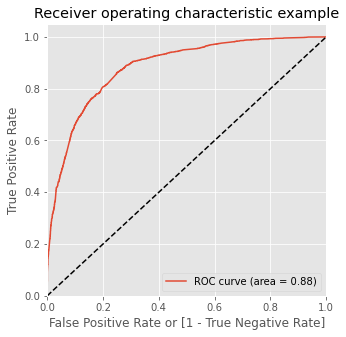

In [100]:
# Here we are call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

**Our Inference** -

We can observe that the area under the ROC Curve is around 0.88. This is a very nice value to move forward with.

Now, let's create the Columns with the different Probability Cut-offs.

In [101]:
# Here we are creating columns with different probability cut-offs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.648651          1    1    1    1    1    1    1    1   
1          0         0.135107          0    1    1    0    0    0    0    0   
2          0         0.238085          0    1    1    1    0    0    0    0   
3          0         0.135107          0    1    1    0    0    0    0    0   
4          0         0.495064          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

Also, let's create a Dataframe to see the values of Accuracy, Sensitivity and Specificity at different values of Probabiity Cut-offs.

In [102]:
# Here we are creating a dataframe to see the values of above mentioned criteria

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

prob  accuracy     sensi     speci
0.0   0.0  0.386711  1.000000  0.000000
0.1   0.1  0.577547  0.983713  0.321438
0.2   0.2  0.758463  0.913681  0.660591
0.3   0.3  0.788380  0.872557  0.735302
0.4   0.4  0.809321  0.764658  0.837484
0.5   0.5  0.810266  0.695440  0.882670
0.6   0.6  0.802551  0.627443  0.912965
0.7   0.7  0.772792  0.501629  0.943774
0.8   0.8  0.753110  0.413274  0.967394
0.9   0.9  0.706345  0.259772  0.987933

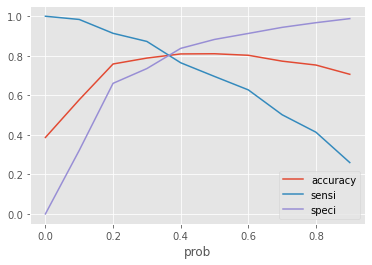

In [103]:
# Here we are plotting the above Dataframe

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**Our Inference** -

We can observe from the above graph that the Optimal Cut-off is at around 0.35.

In [104]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.648651          1    1    1    1    1    1    1    1   
1          0         0.135107          0    1    1    0    0    0    0    0   
2          0         0.238085          0    1    1    1    0    0    0    0   
3          0         0.135107          0    1    1    0    0    0    0    0   
4          0         0.495064          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                1  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                1

In [105]:
# Here we are checking the overall accuracy of the model

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8031806014800819

In [106]:
# Here we are creating the confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3126,  769],
       [ 481, 1975]], dtype=int64)

In [107]:
# Here we are substituting the value of True Positive

TP = confusion2[1,1]

In [108]:
# Here we are substituting the value of True Negative

TN = confusion2[0,0]

In [109]:
# Here we are substituting the value of False Positive

FP = confusion2[0,1]

In [110]:
# Here we are substituting the value of False Negative

FN = confusion2[1,0]

In [111]:
# Here we are calculating the sensitivity

TP/(TP+FN)

0.8041530944625407

In [112]:
# Here we are calculating the specificity

TN/(TN+FP)

0.8025673940949936

**Our Inference** -

As we see that with the current Cut-off of 0.35, we are having the Sensitivity and Specificity around 80%.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## The Prediction on Test set

Now, let's do the prediction using the Test Set. But before that, let's understandand a little about the X_test and Y_test dataset.

In [113]:
# Displaying first 5 Rows and all Columns of the X_test Dataset

X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8308          5.0                          947                   5.0   
7212          4.0                            3                   4.0   
2085          0.0                            0                   0.0   
4048          4.0                         1402                   2.0   
4790          4.0                           12                   2.0   

      Lead Origin_landing page submission  Lead Origin_lead add form  \
8308                                    1                          0   
7212                                    1                          0   
2085                                    0                          1   
4048                                    1                          0   
4790                                    1                          0   

      Lead Origin_lead import  Specialization_business administration  \
8308                        0                                       1   
7212                        0                                       0   
2085                        0                                       0   
4048                        0                                       1   
4790                        0                                       0   

      Specialization_e-business  Specialization_e-commerce  \
8308                          0                          0   
7212                          0                          0   
2085                          0                          0   
4048                          0                          0   
4790                          0                          0   

      Specialization_finance management  ...  \
8308                                  0  ...   
7212                                  0  ...   
2085                                  0  ...   
4048                                  0  ...   
4790                                  0  ...   

      Last Notable Activity_form submitted on website  \
8308                                                0   
7212                                                0   
2085                                                0   
4048                                                0   
4790                                                0   

      Last Notable Activity_had a phone conversation  \
8308                                               0   
7212                                               0   
2085                                               0   
4048                                               0   
4790                                               0   

      Last Notable Activity_modified  \
8308                               1   
7212                               0   
2085                               0   
4048                               0   
4790                               0   

      Last Notable Activity_olark chat conversation  \
8308                                              0   
7212                                              0   
2085                                              0   
4048                                              0   
4790                                              0   

      Last Notable Activity_page visited on website  \
8308                                              0   
7212                                              0   
2085                                              0   
4048                                              0   
4790                                              0   

      Last Notable Activity_resubscribed to emails  \
8308                                             0   
7212                                             0   
2085                                             0   
4048                                             0   
4790                                             0   

      Last Notable Activity_sms sent  Last Notable Activity_unreachable  \
8308                               0                    

In [114]:
# Here we are checking the number of Rows and Columns of X_test Dataframe

X_test.shape

(2723, 80)

In [115]:
# Here we are checking the Columns present in our newly created X_test dataset

X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Origin_lead import', 'Specialization_business administration',
       'Specialization_e-business', 'Specialization_e-commerce',
       'Specialization_finance management',
       'Specialization_healthcare management',
       'Specialization_hospitality management',
       'Specialization_human resource management',
       'Specialization_international business',
       'Specialization_it projects management',
       'Specialization_marketing management',
       'Specialization_media and advertising',
       'Specialization_operations management',
       'Specialization_retail management',
       'Specialization_rural and agribusiness',
       'Specialization_services excellence',
       'Specialization_supply chain management',
       'Specialization_travel and tourism', 'Lead Source_blog',
       'Lead Source_click2call',

In [116]:
y_test.head()

8308    0
7212    1
2085    1
4048    1
4790    0
Name: Converted, dtype: int64

Now, let's first do the Scaling of Numeric Values.

In [117]:
# Here we are doing the scaling the numeric values

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [118]:
# Here we are now substituting all the columns in the final train model

col = X_train.columns

Now, let's select the Columns of X_train for X_test as well.

In [119]:
# Here we are select the columns in X_train for X_test dataset

X_test = X_test[col]

In [120]:
# Here we are now add a constant to X_test dataset

X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

const  TotalVisits  Total Time Spent on Website  \
8308    1.0     0.035461                     0.416813   
7212    1.0     0.028369                     0.001320   
2085    1.0     0.000000                     0.000000   
4048    1.0     0.028369                     0.617077   
4790    1.0     0.028369                     0.005282   
...     ...          ...                          ...   
3261    1.0     0.000000                     0.000000   
8179    1.0     0.170213                     0.148768   
6236    1.0     0.000000                     0.000000   
5240    1.0     0.078014                     0.458627   
7243    1.0     0.035461                     0.499560   

      Lead Origin_lead add form  Lead Source_olark chat  \
8308                          0                       0   
7212                          0                       0   
2085                          1                       0   
4048                          0                       0   
4790                          0                       0   
...                         ...                     ...   
3261                          0                       1   
8179                          0                       0   
6236                          0                       1   
5240                          0                       0   
7243                          0                       0   

      Lead Source_welingak website  Do Not Email_yes  \
8308                             0                 0   
7212                             0                 0   
2085                             1                 0   
4048                             0                 0   
4790                             0                 0   
...                            ...               ...   
3261                             0                 0   
8179                             0                 0   
6236                             0                 0   
5240                             0                 0   
7243                             0                 0   

      Last Activity_olark chat conversation  Last Activity_sms sent  \
8308                                      0                       0   
7212                                      0                       1   
2085                                      0                       0   
4048                                      0                       1   
4790                                      0                       0   
...                                     ...                     ...   
3261                                      1                       0   
8179                                      0                       1   
6236                                      0                       0   
5240                                      0                       1   
7243                                      0                       0   

      What is your current occupation_student  \
8308                                        0   
7212                                        0   
2085                                        0   
4048                                        0   
4790                                        0   
...                                       ...   
3261                                        0   
8179                                        0   
6236                                        0   
5240                                        0   
7243                                        0   

      What is your current occupation_unemployed  \
8308                                           1   
7212                                           0   
2085                                           1   
4048                                           1   
4790                                           1   
...                                          ...   
3261                                           1   
8179                                           0   
6236                         

Now, let's do some following operations of storing prediction and converting Y_test to a Dataframe.

In [121]:
# Here we are storing prediction of test set in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [122]:
# Here we are coverting y_test_pred to a dataframe

y_pred_df = pd.DataFrame(y_test_pred)

In [123]:
# Here we are converting y_test to a dataframe

y_test_df = pd.DataFrame(y_test)

In [124]:
# Here we are removing index for both the dataframes to append them side by side

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [125]:
# Here we are appending y_test_df and y_pred_df

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [126]:
# Here we are renaming the column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.457908
1          1         0.839048
2          1         0.982785
3          1         0.878283
4          0         0.108296

Now, let's make the prediction using the Cut-off 0.35.

In [127]:
# Here we are making the prediction

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

Converted  Conversion_Prob  final_predicted
0             0         0.457908                1
1             1         0.839048                1
2             1         0.982785                1
3             1         0.878283                1
4             0         0.108296                0
...         ...              ...              ...
2718          1         0.108126                0
2719          0         0.374824                1
2720          0         0.135107                0
2721          1         0.821933                1
2722          1         0.553060                1

[2723 rows x 3 columns]

In [128]:
# Here we are check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8094013955196474

In [129]:
# Here we are creating the confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1406,  338],
       [ 181,  798]], dtype=int64)

Now, let's calculate the Sensitivity and Specificity again.

In [130]:
# Here we are substituting the value of True Positive

TP = confusion2[1,1]

In [131]:
# Here we are substituting the value of True Negative

TN = confusion2[0,0]

In [132]:
# Here we are substituting the value of False Positive

FP = confusion2[0,1] 

In [133]:
# Here we are substituting the value of False Negative

FN = confusion2[1,0]

In [134]:
# Here we are calculating the sensitivity

TP/(TP+FN)

0.81511746680286

In [135]:
# Here we are calculating the specificity

TN/(TN+FP)

0.8061926605504587

**Our Inference** -

As we see that with the current Cut-off of 0.35, we are having the Sensitivity around 81% and Specificity around 80%.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## The Precision-Recall

Now, it's time to calculate Precision and Recall. We know that Precision quantifies the number of positive class predictions that actually belong to the positive class. Whereas Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.

Now, first let's create the Confusion Matrix using 'y_train_pred_final.Converted' and 'y_train_pred_final.Predicted'.

In [136]:
# Here we are creating the Confusion Matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3438,  457],
       [ 748, 1708]], dtype=int64)

Now, we will calculate the Precision.

**Precision = TP / (TP + FP)**

In [137]:
# Here we are calculating the precision

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7889145496535797

Now, we will calculate the Recall.

**Recall = TP / (TP + FN)**

In [138]:
# Here we are calculating the recall

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6954397394136808

**Our Inference** -

As we see that with the current Cut-off of 0.35, we are having the Precision of 78% and Recall around 70%.

### The Precision and Recall Tradeoff

Here we will now see the Precision and Recall Tradeoff of our Model.

In [139]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [140]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

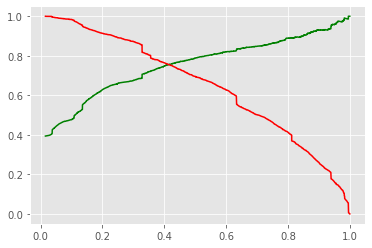

In [141]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [142]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.648651          1    1    1    1    1    1    1    1   
1          0         0.135107          0    1    1    0    0    0    0    0   
2          0         0.238085          0    1    1    1    0    0    0    0   
3          0         0.135107          0    1    1    0    0    0    0    0   
4          0         0.495064          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                1  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                1

In [143]:
# Here we are calculating the accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8112108329396945

In [144]:
# Here we are creating the confusion matrix again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3289,  606],
       [ 593, 1863]], dtype=int64)

In [145]:
# Here we are substituting the value of True Positive

TP = confusion2[1,1]

In [146]:
# Here we are substituting the value of True Negative

TN = confusion2[0,0]

In [147]:
# Here we are substituting the value of False Positive

FP = confusion2[0,1] 

In [148]:
# Here we are substituting the value of False Negative

FN = confusion2[1,0]

In [149]:
# Here we are calculating the precision

TP / (TP + FP)

0.7545565006075334

In [150]:
# Here we are calculating the recall

TP / (TP + FN)

0.7585504885993485

**Our Inference** -

As we see that with the current Cut-off of 0.41, we are having the Precision of 74% and Recall around 76%.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## The Prediction on Test Set

Now, let's finally do the prediction on the Test Set.

In [151]:
# Here we are storing the prediction of test set in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [152]:
# Here we are coverting y_test_pred to a dataframe

y_pred_df = pd.DataFrame(y_test_pred)

In [153]:
# Here we are converting y_test to a dataframe

y_test_df = pd.DataFrame(y_test)

In [154]:
# Here we are removing index for both the dataframes to append them side by side 

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [155]:
# Here we are appending y_test_df and y_pred_df

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [156]:
# Here we are renaming the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.457908
1          1         0.839048
2          1         0.982785
3          1         0.878283
4          0         0.108296

Now, let's make the prediction using the Cut-off 0.41.

In [157]:
# Here we are making the prediction

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

Converted  Conversion_Prob  final_predicted
0             0         0.457908                1
1             1         0.839048                1
2             1         0.982785                1
3             1         0.878283                1
4             0         0.108296                0
...         ...              ...              ...
2718          1         0.108126                0
2719          0         0.374824                0
2720          0         0.135107                0
2721          1         0.821933                1
2722          1         0.553060                1

[2723 rows x 3 columns]

In [158]:
# Here we are checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8149100257069408

In [159]:
# Here we are creating the confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1472,  272],
       [ 232,  747]], dtype=int64)

In [160]:
# Here we are substituting the value of True Positive

TP = confusion2[1,1]

In [161]:
# Here we are substituting the value of True Negative

TN = confusion2[0,0]

In [162]:
# Here we are substituting the value of False Positive

FP = confusion2[0,1] 

In [163]:
# Here we are substituting the value of False Negative

FN = confusion2[1,0]

In [164]:
# Here we are calculating the precision

TP / (TP + FP)

0.7330716388616291

In [165]:
# Here we are calculating the recall

TP / (TP + FN)

0.763023493360572

**Our Inference** -

As we see that with the current Cut-off of 0.41, we are having the Precision of 73% and Recall around 75%.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## The Conclusion

Finally, after doing all the evaluation, analysis, model building, we arrive on our conclusion.

We found that the variables that mattered the most in the potential buyers are as follows (In the Descending Order) :

1.	The Total Time spend on the Website.
2.	Total number of visits.
3.	When the lead source was: <br>
a.	Google<br>
b.	Direct traffic<br>
c.	Organic search<br>
d.	Welingak website<br>
4.	When the last activity was:<br>
a.	SMS<br>
b.	Olark chat conversation<br>
5.	When the lead origin is Lead ad form.
6.	When their current occupation is as a working professional.<br>

**Note** -

1. The given data has been checked to understand the insights of it.
2. This model has been verified for Multicollinearity effects.
3. The RFE and VIF have been calculated correctly and marked fine and in-shape.
4. The Confusion Matrices have been made and Sensitivity and Specificity have been calculated properly.
5. The ROC Curve has been made and its value has been recoded as the good one.
6. The Precision and Recall has been calculated accordingly.
7. The final prediction has been made on Test Set.

The Final Model on which the Prediction was done using the Test Set, is having Cut-off of 0.41, the Precision of 73% and Recall around 75%.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## The Interpretation

Finally, we can do some interpretation from our analysis after building the final model.

1. We observed that leads that are spending more time on the X Education's website and making frequent visits there, are having great potention of converting into a buyer. Hence, X Education can focus on making their website more appealing.
2. We observed that leads that converted into buyers, were mostly transfered from 'Google', 'Direct traffic', 'Organic search' and 'Welingak website'. Hence, X Education can consider increasing their Digital Campaign, investing in Search Engine Optimization and boosting Website Ads.
3. We observed that leads that were contacted through 'SMS' and 'Olark chat conversation' has the great potential of converting into a buyer. Therefore, X Education can focus contacting leads mostly through these two modes of communication.
4. We observed that a lot of data about the potential leads came from Lead Ad Form. X Education in this case can consider putting more ad forms across all the platforms of their marketing. This will help in drawing more candidates towards them and ultimately can convert them into a buyer.
5. We observed that all those leads having occupation of 'Working Professional' are having the potential of converting into a buyer. Hence, X Education can focus on targetting mostly working professional by including some unique offers and discounts to them.

At last we can say that by considering these points, the X Education can prosper and grow in business as they have a very high chance to get almost all the potential buyers to rethink and buy their courses. X Education needs to increase its affinity.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Now, we come to an End of our Lead Scoring Assignment. We did a lot of analysis on the provided Data and we found some really great insights. This group case study was a great oppurtunity to learn about Logistic Regression, Feature Selection, Feature Scaling, Model Building, Model Validation and Evaluation. Also, it was a great chance to learn and implement the libraries of statsmodels and sklearn. We want to thank upGrad and IIIT-B for this amazing learning oppurtunity.

# The End

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**